**Goal:** Explore the data relationships of all your features and understand how the features compare to the response variable.

* Build data profiles and tables
    * Inferential statistics
* Explore data relationships
    * Data visualization
* Feature Selection and Engineering

**Inferential Statistics Hint:** do any particular results in your data strike you as abnormal? What hypotheses can you form (Null and Alternative hypotheses) which you could go on to test? Take some time to recall your statistical concepts, such as that the p-value of an observation is the probability of seeing data at least as extreme as that observation, on the assumption of the null hypothesis.

**Data Visualization Hint:** recall your matplotlib and seaborn functions for datavisualization: matplotlib:

- plt.plot()
- plt.xlabel()
- plt.show()
- plt.hist(),

Seaborn:
- sns.relplot()
- sns.lmplot()
- sns.catplot()

Remember to always start with an idea of what you want to achieve, and use theselibraries and their functions as your toolkit to make that idea a reality.

**Feature Selection and Engineering Hint:** feature selection is where data storytelling starts: we tell a story as soon as we include certain features and omit others. But how we manipulate - or engineer - those fields is just as important. Recall the crucial elements to feature engineering:
- If you have categorical features, you might need to one-hot encode them
- You may need to binarize your columns and bin your values.
- To handle missing data, think about how appropriate the methods of listwise deletion, data imputation, replacing missing values with constants or simply attempting to find the missing values are for your data.
- Think about whether you need to standardize, log-transform or normalize your data, as well as statistically valid ways to remove outliers.


Consider the following questions and use your understanding of your dataset to answer them:
* Are there variables that are particularly significant in terms of explaining the answer to your project question?
* Are there significant differences between subgroups in your data that may be relevant to your project aim?
* Are there strong correlations between pairs of independent variables or between an independent and a dependent variable?
* What are the most appropriate tests to use to analyze these relationships?

In [78]:
import pandas as pd
import os
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [30]:
# Import data & drop nuissance columns
multi_cats = pd.read_csv('../data/SAT_2018_multicategories.csv').drop(['Unnamed: 0'], axis=1, errors='ignore')
single_cats = pd.read_csv('../data/SAT_2018_single_categories.csv').drop(['Unnamed: 0'], axis=1, errors='ignore')
psat_sat = pd.read_csv('../data/SAT_PSAT_aggregated.csv').drop(['Unnamed: 0'], axis=1, errors='ignore')

In [69]:
# Fix dtypes after data import
psat_sat = psat_sat.astype({'District Number': 'str',
                 'District Name': 'str',
                 'School Number': 'str',
                 'School Name': 'str',
                 '2018 EBRW Mean SAT': 'float64',
                 '2018 Math Mean SAT': 'float64',
                 '2018 Overall Mean Score SAT': 'float64',
                 '2017 EBRW Mean PSAT10': 'float64',
                 '2017 Math Mean PSAT10': 'float64',
                 '2017 Overall Mean Score PSAT10': 'float64',
                 'Zip Code': 'str',
                 'Median Family Income': 'float64',
                 'Population': 'float64'})

psat_sat['Zip Code'] = psat_sat['Zip Code'].str.strip('.0')

single_cats = single_cats.astype({'District Number': 'str',
                                 'School Number': 'str',
                                 '2018 EBRW': 'float64',
                                 '2018 Math': 'float64',
                                 '2018 Overall': 'float64',
                                 'Zip Code': 'str',
                                 'Median Family Income': 'float64',
                                 'Population': 'float64'})

single_cats['Zip Code'] = single_cats['Zip Code'].str.strip('.0')


multi_cats = multi_cats.astype({'District Number': 'str',
                                 'School Number': 'str',
                                 'Zip Code': 'str'})

multi_cats['Zip Code'] = multi_cats['Zip Code'].str.strip('.0')

In [70]:
dict(multi_cats.dtypes)

{'District Number': dtype('O'),
 'District Name': dtype('O'),
 'School Number': dtype('O'),
 'School Name': dtype('O'),
 'Gend': dtype('O'),
 'Ethn': dtype('O'),
 'FRL': dtype('O'),
 'ELL': dtype('O'),
 'IEP': dtype('O'),
 'Mean Score Math': dtype('float64'),
 'Mean Score EBRW': dtype('float64'),
 'Zip Code': dtype('O'),
 'Median Family Income': dtype('float64'),
 'Population': dtype('float64')}

## Aggregated 2017 PSAT & 2018 SAT data

Next steps:
* Scores grouped by district?

In [37]:
psat_sat.head()

,District Number,District Name,School Number,School Name,2018 EBRW Mean SAT,2018 Math Mean SAT,2018 Overall Mean Score SAT,2017 EBRW Mean PSAT10,2017 Math Mean PSAT10,2017 Overall Mean Score PSAT10,Zip Code,Median Family Income,Population
0,10,mapleton 1,187,mapleton expeditionary school of the arts,472.0,467.0,939.0,412.0,430.0,842.0,80299.0,NaN,NaN
1,10,mapleton 1,212,mapleton early college high school,464.0,441.0,905.0,409.0,409.0,818.0,80229.0,54249.0,51224.0
2,10,mapleton 1,263,global leadership academy,443.0,438.0,880.0,410.0,404.0,814.0,80221.0,51699.0,40341.0
3,10,mapleton 1,309,academy high school,452.0,434.0,886.0,411.0,417.0,828.0,80229.0,54249.0,51224.0
4,10,mapleton 1,503,york international,495.0,477.0,972.0,466.0,444.0,910.0,80229.0,54249.0,51224.0


In [186]:
# Drop categorical data for now
# Also drop overall scores since demographic dataset only has separated Math and EBRW scores
ps_scores_only = psat_sat[['2018 EBRW Mean SAT', '2018 Math Mean SAT',
        '2017 EBRW Mean PSAT10',
       '2017 Math Mean PSAT10', 'Median Family Income']]

In [212]:
ps_scores_only.describe()

,2018 EBRW Mean SAT,2018 Math Mean SAT,2017 EBRW Mean PSAT10,2017 Math Mean PSAT10,Median Family Income
count,335.000000,335.000000,335.000000,335.000000,325.000000
mean,502.737313,487.289552,467.665672,457.331343,72287.612308
std,52.339200,53.615478,47.002502,41.486388,23699.204868
min,388.000000,377.000000,364.000000,370.000000,36948.000000
25%,467.000000,451.000000,437.000000,428.000000,52584.000000
50%,502.000000,484.000000,469.000000,454.000000,68889.000000
75%,538.000000,521.000000,499.000000,481.500000,86082.000000
max,659.000000,663.000000,598.000000,594.000000,155777.000000


<Figure size 2880x1440 with 0 Axes>

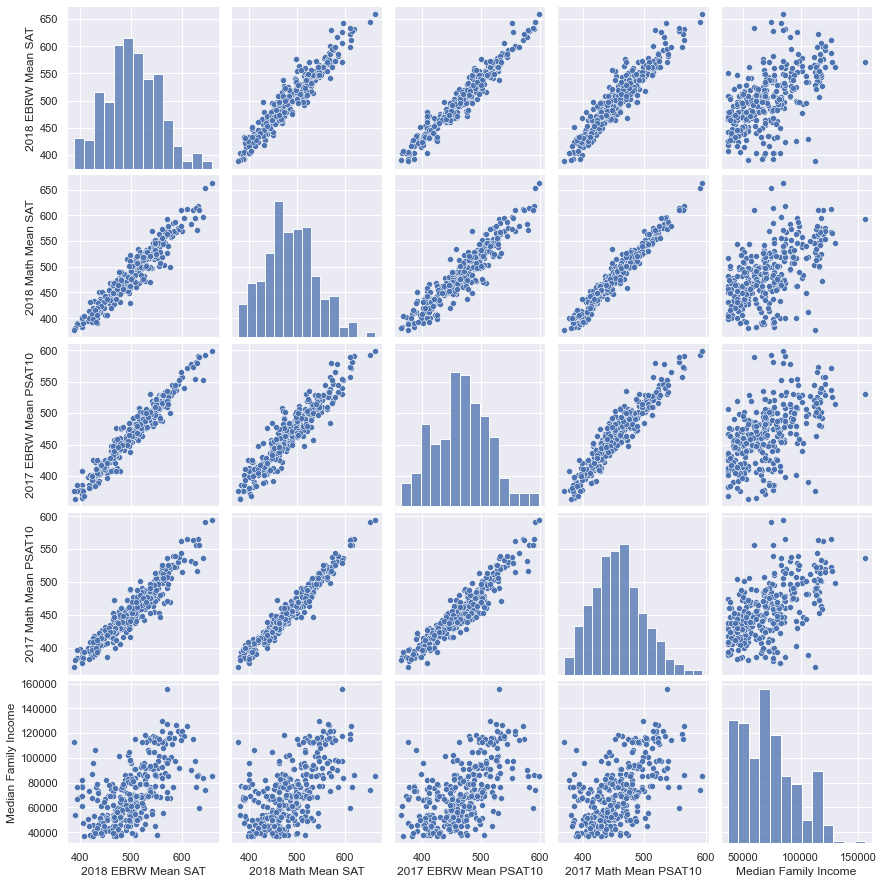

In [188]:
sns.set(font_scale=1)
plt.figure(figsize=(40,20))
sns.pairplot(ps_scores_only)
plt.show()

**Note:** 
* Score histograms for each test indicate possible normal distribution.
* Relationship implied between test scores & median family income

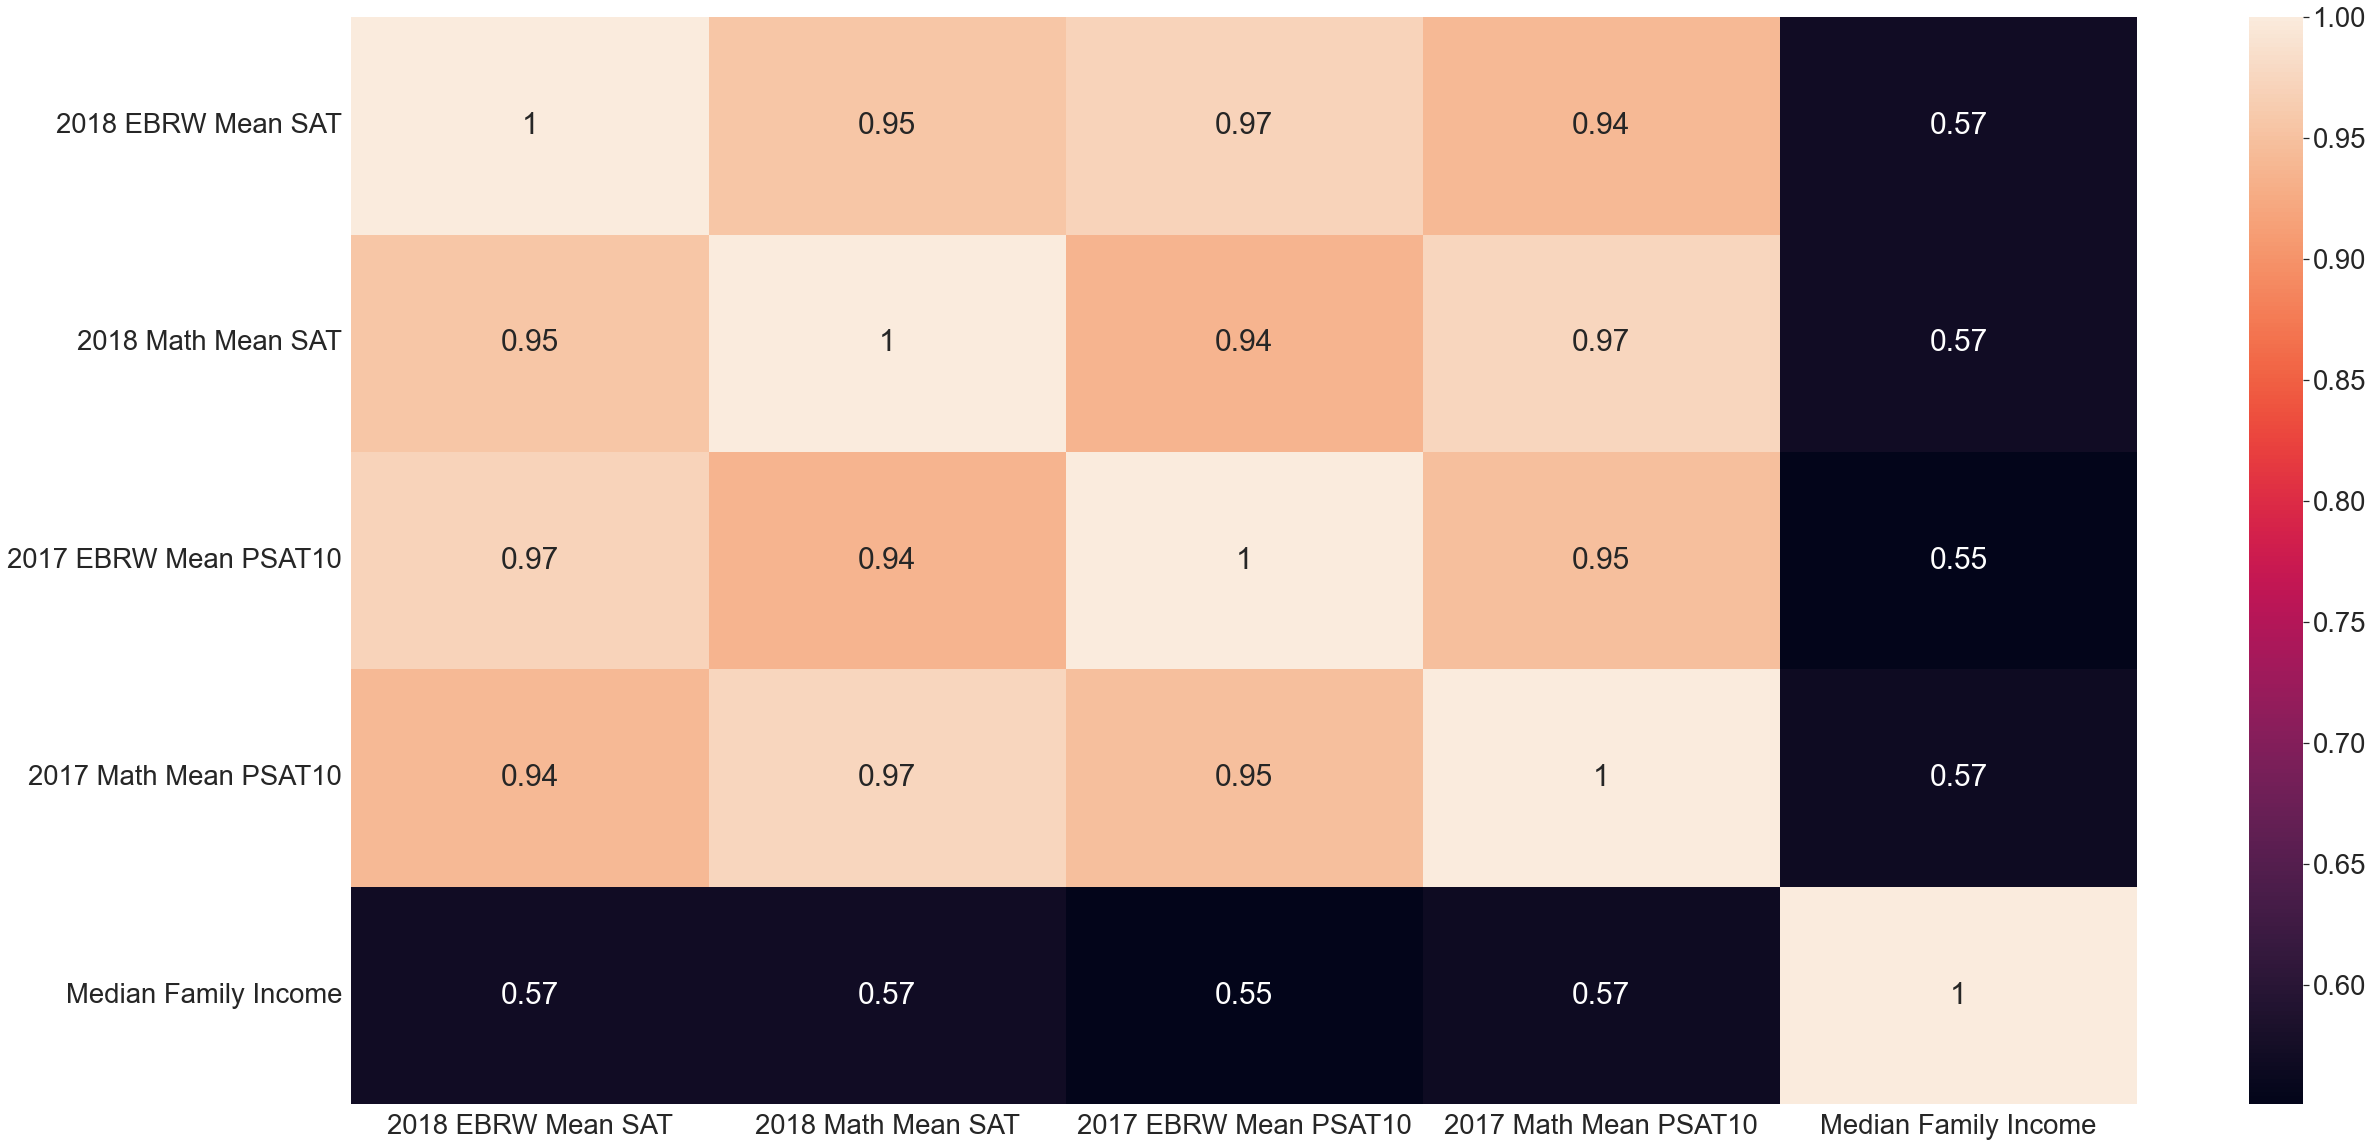

In [189]:
sns.set(font_scale=2.5)
plt.figure(figsize=(40,20))

sns.heatmap(ps_scores_only.corr(), annot=True)
plt.show()

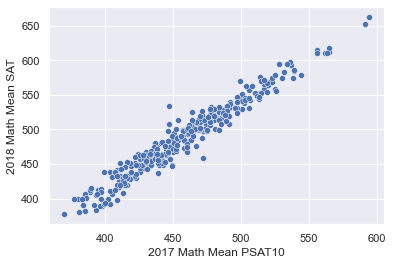

In [213]:
sns.set(font_scale=1)
sns.scatterplot(x='2017 Math Mean PSAT10', y='2018 Math Mean SAT', data=ps_scores_only)
plt.show()

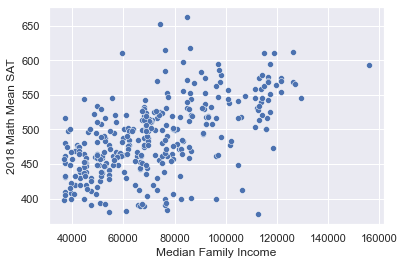

In [214]:
sns.set(font_scale=1)
sns.scatterplot(x='Median Family Income', y='2018 Math Mean SAT', data=ps_scores_only)
plt.show()

**Note:** 
* High correlation between PSAT and SAT scores.  Implies that PSAT scores are good predictor of SAT scores.
* High correlation between different tests for each  year.  High math score $\Longleftrightarrow $ high EBRW score.
* Significant correlation between median family income & test scores.

## Multi demographic categorized data

In [190]:
# Drop school & district categories for now.
mc_scores = multi_cats[['Mean Score Math', 'Mean Score EBRW','Gend', 'Ethn', 'FRL', 'ELL', 'IEP', 
        'Median Family Income']]

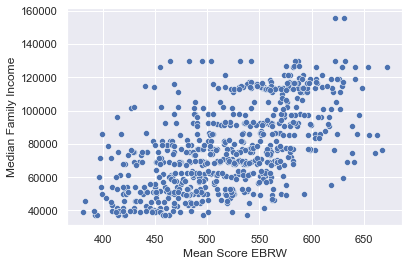

<Figure size 432x288 with 0 Axes>

In [216]:
sns.scatterplot(x='Mean Score EBRW',y='Median Family Income', data=mc_scores)
sns.set(font_scale=1)
plt.figure()
plt.show()

Demographic disaggregated data also implies correlation between MFE and SAT scores.

In [183]:
# One-hot encode categorical variables

col_to_onehotenc = ['Gend', 'Ethn', 'FRL', 'ELL', 'IEP']

encoder = OneHotEncoder(handle_unknown='ignore')
mc_onehot = mc_scores
for col in col_to_onehotenc:
    encoder_df = pd.DataFrame(encoder.fit_transform(mc_scores[[col]]).toarray())
    encoder_df.columns=encoder.get_feature_names_out()
    mc_onehot = mc_onehot.join(encoder_df)
    mc_onehot = mc_onehot.drop(columns=col)

In [217]:
mc_onehot.head()

,Mean Score Math,Mean Score EBRW,Median Family Income,Gend_Female,Gend_Male,Ethn_Asian,Ethn_Black,Ethn_Hispanic,Ethn_Two or More Races,Ethn_White,FRL_FRL Eligible,FRL_Not FRL Eligible,ELL_English Learners,ELL_Not English Learners,IEP_Students with IEPs,IEP_Students without IEPs
0,505.882353,560.588235,118620.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,537.757009,562.056075,68454.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,574.725275,564.395604,68454.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,503.529412,517.058824,121412.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,560.444444,579.222222,121412.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [210]:
mc_onehot.describe()

,Mean Score Math,Mean Score EBRW,Median Family Income,Gend_Female,Gend_Male,Ethn_Asian,Ethn_Black,Ethn_Hispanic,Ethn_Two or More Races,Ethn_White,FRL_FRL Eligible,FRL_Not FRL Eligible,ELL_English Learners,ELL_Not English Learners,IEP_Students with IEPs,IEP_Students without IEPs
count,710.000000,710.000000,696.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000
mean,508.478445,520.142045,77404.277299,0.516901,0.483099,0.014085,0.022535,0.414085,0.011268,0.538028,0.338028,0.661972,0.111268,0.888732,0.005634,0.994366
std,61.580637,59.201688,24918.192458,0.500067,0.500067,0.117923,0.148521,0.492910,0.105624,0.498903,0.473372,0.473372,0.314685,0.314685,0.074900,0.074900
min,358.823529,380.625000,36948.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,463.139205,475.065789,57628.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,510.153846,522.996903,74576.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,550.581897,562.551606,93024.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,692.631579,672.352941,155777.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Note:**

Mean scores between aggregated and disaggregated data do not match.  This was expected because disaggregated data did not include scores if the number of student in a given category was less than 17.  Aggregated data includes scores for all students in each school.

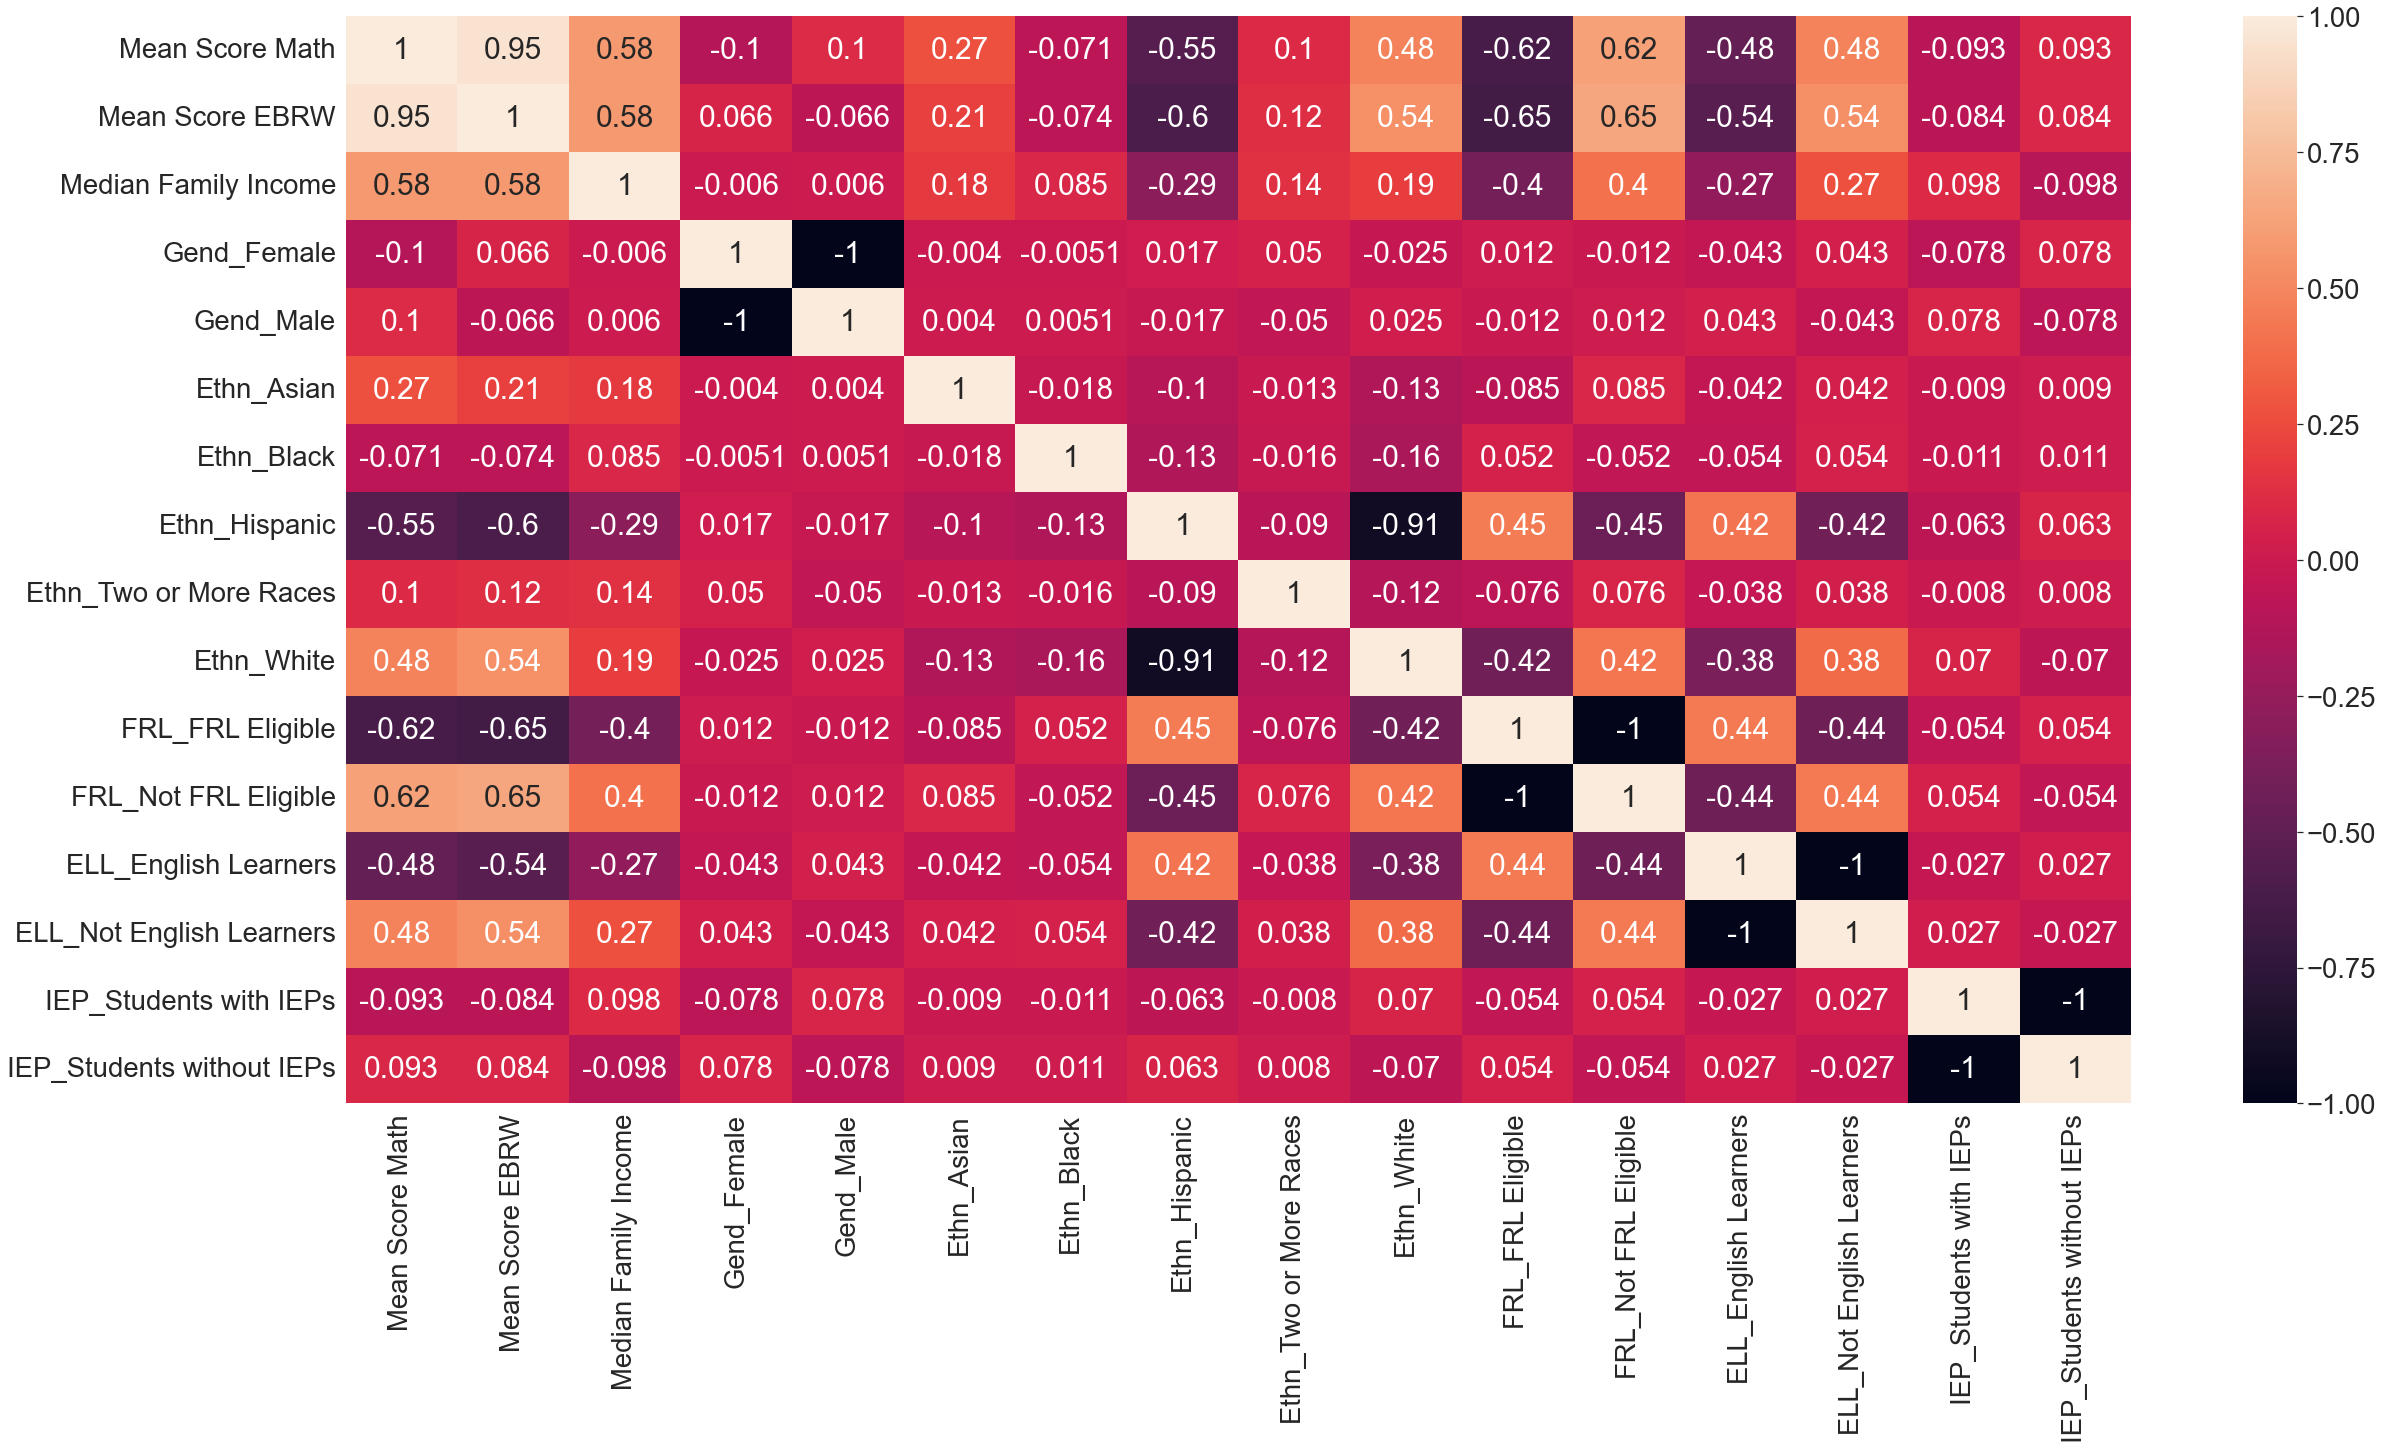

In [200]:
sns.set(font_scale=2.5)
plt.figure(figsize=(40,20))

sns.heatmap(mc_onehot.corr(), annot=True)
plt.show()

Only first two columns (or first two rows) involve the target features.

**Noteworthy characteristics:**

* EBRW & Math mean scores (student scores for subjects) are highly correlated.  High EBRW score $\Longleftrightarrow  $ high math score.

* Most important features in descending order:
    * Free or reduced lunch (FRL)
    * Median family income (MFE)
    * Ethnicity (Hispanic)
    * Engligh language learner (ELL) status
    
* Significant segregation between white & hispanic students may be implied by -0.91 correlation between those two groups.
* Expected inverse correlation between FRL and MFE.  Higher median income $\Longleftrightarrow  $ fewer students qualifying for FRL.

In [209]:
# Get total for each category.
mc_onehot.drop(['Mean Score Math', 'Mean Score EBRW', 'Median Family Income'], axis=1).sum()

Gend_Female                  367.0
Gend_Male                    343.0
Ethn_Asian                    10.0
Ethn_Black                    16.0
Ethn_Hispanic                294.0
Ethn_Two or More Races         8.0
Ethn_White                   382.0
FRL_FRL Eligible             240.0
FRL_Not FRL Eligible         470.0
ELL_English Learners          79.0
ELL_Not English Learners     631.0
IEP_Students with IEPs         4.0
IEP_Students without IEPs    706.0
dtype: float64

**Noteworthy characteristics:**

* Few groups of students with IEPs, may not be enough for statistical significance.  However these are groups of students, not individuals.  Scores were only reported if there were at least 16 students for each group.

# Major takeaways from initial EDA

### PSAT10 vs SAT
* PSAT10 scores in 2017 are highly correlated with SAT scores in 2018.  Correlation coefficient 0.97 for both EBRW and Math scores.
* There are 5 demographic variables which each have a magnitude greater than 0.5 with SAT scores in 2018.

**The big question** is whether the most significant demographic variables collectively outweigh the correlation between PSAT and SAT scores.

It is important to note that the same demographic variables can impact PSAT and SAT scores in the same way.  The question here involves a veil of ignorance.  If we *only* know the PSAT scores will that be a better predictor than if we *only* know the demographic variables?